<a href="https://colab.research.google.com/github/Khiet-ht/Bai_Tap_AI/blob/main/W4_25_02_23_Baitaptrenlop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5874e3169cf48f91f493a18e26e3cfe82b3311479969869f4cea2680fd2f3dd7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


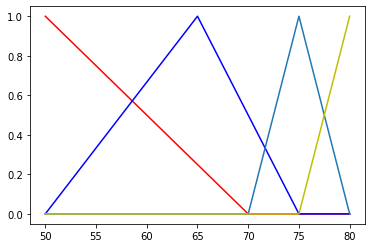

In [9]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

x= np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[50,65,75])
medium_fast = fuzz.trimf(x,[70,75,80])
full_speed = fuzz.trimf(x,[75,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

26.666666666666657


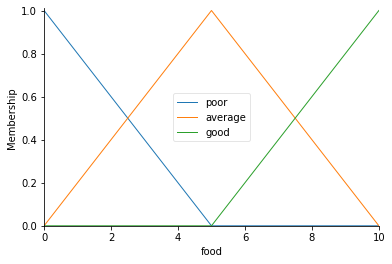

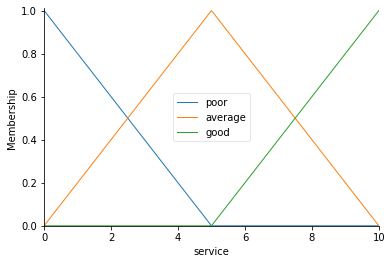

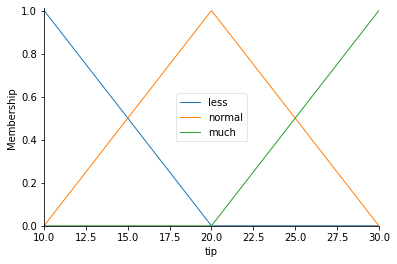

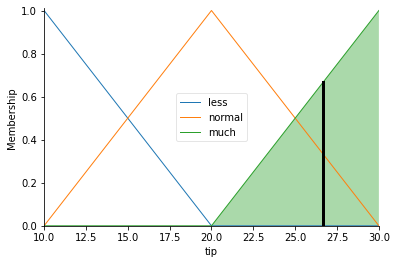

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less']= fuzz.trimf(tip.universe,[0,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])


food.view()
service.view()
tip.view()


rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule4 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule7 = ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule8 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])


#dsfasfsaf
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 10
tipping.input['service']= 5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


55.15669515669514


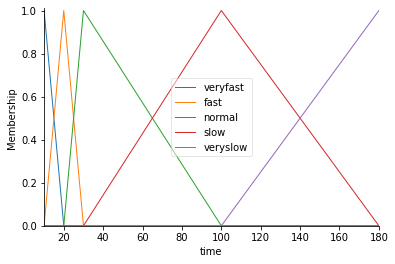

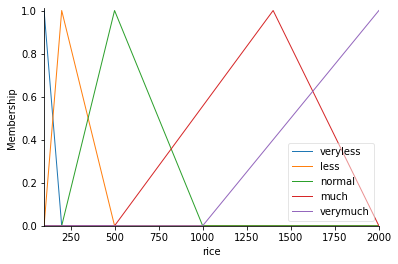

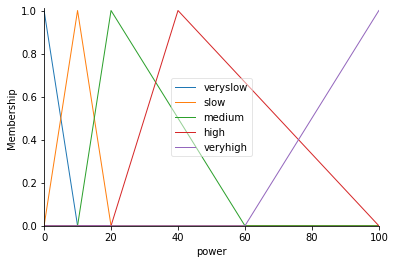

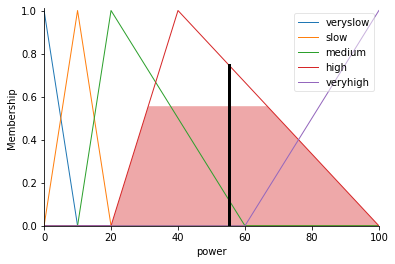

In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')


time['veryfast']= fuzz.trimf(time.universe,[10,10,20])
time['fast']=fuzz.trimf(time.universe,[10,20,30])
time['normal'] = fuzz.trimf(time.universe,[20,30,100])
time['slow']= fuzz.trimf(time.universe,[30,100,180])
time['veryslow']= fuzz.trimf(time.universe,[100,180,180])
rice['veryless'] = fuzz.trimf(rice.universe,[100,100,200])
rice['less'] = fuzz.trimf(rice.universe,[100,200,500])
rice['normal'] = fuzz.trimf(rice.universe,[200,500,1000])
rice['much'] = fuzz.trimf(rice.universe,[500,1400,2000])
rice['verymuch'] = fuzz.trimf(rice.universe,[1000,2000,2000])
power['veryslow'] = fuzz.trimf(power.universe,[0,0,10])
power['slow'] = fuzz.trimf(power.universe,[0,10,20])
power['medium'] = fuzz.trimf(power.universe,[10,20,60])
power['high'] = fuzz.trimf(power.universe,[20,40,100])
power['veryhigh'] = fuzz.trimf(power.universe,[60 ,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['veryfast']&rice['veryless'],power['high'])
rule2 = ctrl.Rule(time['fast']&rice['veryless'],power['medium'])
rule3 = ctrl.Rule(time['normal']&rice['veryless'],power['medium'])
rule4 = ctrl.Rule(time['slow']&rice['veryless'],power['slow'])
rule5 = ctrl.Rule(time['veryslow']&rice['veryless'],power['veryslow'])
rule6 = ctrl.Rule(time['veryfast']&rice['less'],power['high'])
rule7 = ctrl.Rule(time['fast']&rice['less'],power['high'])
rule8 = ctrl.Rule(time['normal']&rice['less'],power['medium'])
rule9 = ctrl.Rule(time['slow']&rice['less'],power['slow'])
rule10 = ctrl.Rule(time['veryslow']&rice['less'],power['veryslow'])
rule11 = ctrl.Rule(time['veryfast']&rice['normal'],power['high'])
rule12 = ctrl.Rule(time['fast']&rice['normal'],power['high'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['medium'])
rule14 = ctrl.Rule(time['slow']&rice['normal'],power['slow'])
rule15 = ctrl.Rule(time['veryslow']&rice['normal'],power['veryslow'])
rule16 = ctrl.Rule(time['veryfast']&rice['much'],power['veryhigh'])
rule17 = ctrl.Rule(time['fast']&rice['much'],power['veryhigh'])
rule18 = ctrl.Rule(time['normal']&rice['much'],power['high'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['medium'])
rule20 = ctrl.Rule(time['veryslow']&rice['much'],power['slow'])
rule21 = ctrl.Rule(time['veryfast']&rice['verymuch'],power['veryhigh'])
rule22 = ctrl.Rule(time['fast']&rice['verymuch'],power['veryhigh'])
rule23 = ctrl.Rule(time['normal']&rice['verymuch'],power['high'])
rule24 = ctrl.Rule(time['slow']&rice['verymuch'],power['medium'])
rule25 = ctrl.Rule(time['veryslow']&rice['verymuch'],power['slow'])



powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']= 1000
powering.input['time']= 30
powering.compute()
print(powering.output['power'])
power.view(sim=powering)

